Q1. We will use the wine quality dataset provided by sklearn to build a logistic regression classifier (see class examples )

Q1a. Import the dataset from sklearn [5  points]

In [1]:
#A1a. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
data = load_wine()

Q1b. List the feature names in this dataset [5 points]

In [2]:
#A1b.
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Q1c. How many classes (targets or labels) are there in this dataset? [5 points]

In [3]:
#A1c. 
# There are 3 classes
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Q1d. List the class names [5 points]

In [4]:
#A1d.
# The class names are class_0, class_1, and class_2
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Q1e. Prepare training and test data using sklearn train_test_split [5 points]

In [4]:
#A1e.
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.30, random_state = 45)

In [5]:
#Because these data are of different measurements. you will need to scale the data.
#I will give you move examples of this in the next couple of weeks

#importing standardization package from sklearn
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()
# fit scaler on training data and transform it
X_train = scaler.fit_transform(X_train)
# fit scaler on testing data and transform it
X_test = scaler.fit_transform(X_test)

Q1f. Build a logistic regression classifier on this dataset using the training data from the earlier questions [5 points]

In [6]:
#A1f.
#################################################
# This dataset has 178 samples Total
# 70% of the Data for Training = 124
print(X_train.shape)
print(y_train.shape)
# 30% of the Data for Testing = 54
print(X_test.shape)
print(y_test.shape)
#################################################

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

(124, 13)
(124,)
(54, 13)
(54,)


Q1g. Build the confusion matrix. You do not need to graph it, just use the sklearn confusion matrix. [5 points]

In [7]:
#A1g.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 19]], dtype=int64)

Q1h. What is the accuracy, precision, recall, and F1-score for this model? [5 points]

In [8]:
#A1h.
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='macro'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='macro'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='macro'))))

Accuracy:      0.9814814814814815  
Precision:     0.9824561403508771  
Recall:        0.9833333333333334  
f1 score:      0.9824439824439825  


Q1i. Using values from Q1h, explain if you think this is a good or bad classifier [5 points]

A1i. Based on the values from Q1h, I believe that this is a good classifier. Across the board, this classifier was correct 98% of the time. Performance is close to 100%.

Q2. This question is based on a real-world problem I am dealing with now. I am trying to see if we can categorize two different types of users. I am looking at a parenting subreddit. Some of the users cross post to more conservative subreddit. Others post to liberal subreddits. I wanted to see if there are any differences between users posting to each. 

There are two classes. MRA = 0 are those users who post to more liberal subreddits. MRA = 1 represents users who post to more conservative subreddits. 

The main question that I want to pose is whether we can detect a difference in the lanugage used by our two classes. In other words, can we use tokens (words) used by each group to build a classifier that differentiates them? 

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [45]:
#The file to upload is found here: https://drive.google.com/file/d/1e9DrrIRX8H6KUqBfpTnnbqE4YSyY1xjJ/view?usp=sharing
#This is a compressed file, so you'll need to use the following code to get it:
import pandas as pd
df = pd.read_json('/content/gdrive/MyDrive/Rutgers New Brunswick/[2020-2021] Program +1/Spring Semester (2021)/Machine Learning/Collab_Datasets/df_small.zip',compression='zip')

In [46]:
df = df[['body','MRAD']]

In [80]:
df.head()

,body,MRAD
0,Keep showing that little guy all the love in t...,0
1,Those last four words are what's truly importa...,0
2,That was 27 years ago for myself. I consider m...,0
3,I also have 3 daughters and a baby boy. You ev...,0
4,Looking good both of you. Boys are the best g...,0


Q2a. First, create features from the text data in this dataframe. Use CountVectorizer in order to produce a bag of words. Use 'english' stop words as provided in the CountVectorizer. Use max_features=10000. [5 points]

In [81]:
#A2a.
from sklearn.feature_extraction.text import CountVectorizer
corpus = list(df.body)
vectorizer = CountVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['00', '000', '00am', '00pm', '01', '02', '03', '036c3a2194c04d4a9de2fa19138e2210', '04', '05', '07', '08', '09', '0a', '0akminder', '0areplaceme', '10', '100', '1000', '100k', '100th', '100x', '101', '102', '10am', '10k', '10lb', '10lbs', '10mo', '10pm', '10th', '10yo', '11', '110', '111', '11lbs', '11mo', '11pm', '11th', '12', '120', '12am', '12lbs', '12oz', '12th', '12v', '13', '130', '1300', '13th', '14', '148', '14oz', '14th', '15', '150', '1500', '15th', '16', '16mo', '17', '18', '180', '18mo', '18th', '19', '1970', '19th', '1am', '1lb', '1pm', '1st', '1yo', '20', '200', '2001', '20036c3a2194c04d4a9de2fa19138e2210', '2007', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2029', '203', '204e23f6fc53bb454eb540f8679de38ce1', '20below', '20change', '20comment', '20days', '20do', '20email', '20exists', '20from', '20if', '20kzreminderbot', '20line', '20message', '20not', '20of', '20on', '20reminder', '20reminders', '20s', '20second', '20settings', '20th

Q2b. Now, how many features do you get? [5 points]

In [69]:
#A2b.
# There are 10000 features
X.shape

(25681, 10000)

Q2c. Get an example of the features. Specifically, I want you to get the features between 3000 and 3020. [5 points]

In [71]:
#A2c.
vectorizer.get_feature_names()[3000:3020]

['esp',
 'especially',
 'espousing',
 'espresso',
 'essential',
 'essentially',
 'essentials',
 'est',
 'establish',
 'established',
 'esteem',
 'estimate',
 'eternity',
 'ethic',
 'ethics',
 'etsy',
 'eu',
 'europe',
 'european',
 'eve']

Q2d. Now unfold the features into a larger array. Use the "to_array" feature. [5 points]

In [72]:
#A2d.
X = X.toarray()
print(list(X[1][0:5]))

[0, 0, 0, 0, 0]


Q2e. Setup the X_train, X_test,y_train, y_test using train_test_split
Remember, your X is the set of features (NOT THE FEATURE NAMES) created using CountVectorizer. [5 points]


You y is the two classes discussed in the question description.

In [75]:
#A2e.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df.MRAD, test_size=0.3,random_state=1)

#Train = 70% of 25681 = 17976
#Test = 30% of 25681 = 7705
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17976, 10000)
(7705, 10000)
(17976,)
(7705,)


Q2f. Setup a naive bayes classifier and make a prediction based on X_test (the test data) [5 points]

In [76]:
#A2f.

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Q2g. Get the confusion matrix for this classifier [5 points]

Text(0.5, 257.44, 'Predicted label')

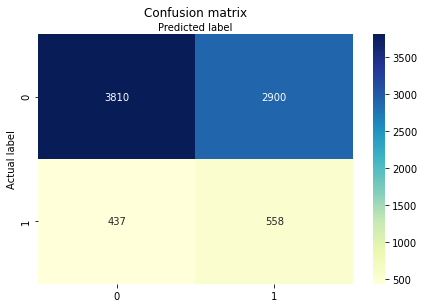

In [79]:
#A2g.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


####### Extra #######
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Q2h. Get the metrics (accuracy, precision,recall, f1-score) for this classifier [5 points]

In [78]:
#A2h.
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='binary'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='binary'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='binary'))))

Accuracy:      0.5669046073977937  
Precision:     0.16136495083863506 
Recall:        0.5608040201005026  
f1 score:      0.2506175611947002  


Q2i. Given the confusion matrix and the metrics, do you think this is a good classifier? In other words, given the introduction to the question, is this a good model to use in differentiating between men who happen to copost to convesrative subreddits and those who post to more liberal subreddits using the text of their comments? [10 points]


Article of Reference: https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

A2i. Given that the question is asking whether this is a "good" model to differentiate between men who post to more liberal subreddits vs. men who post to more conservative subreddits, I would say that this does a "decent" job when favoring ACCURACY over F1-Score. In regards to accuracy, the model can accurately predict 56% of the data (more than half), meaning this classifier can, to some extent, differentiate between 2 classes. Precision is very low, which indicates that not many of teh selected items are relevant. Conversely, more than half (56%) of the relevant items are selected when looking at Recall. 

Based on F1-Score, the overall performance of this model is 25%. The F1-Score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes. Based on F1-Score, I would argue that this is not a good classifier.

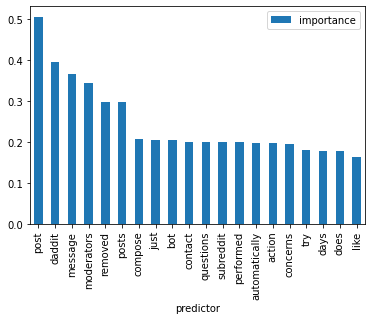

In [82]:
predict_score_NB = list(zip(vectorizer.get_feature_names(), gnb.theta_[1]))
predict_score_sorted_NB = sorted(predict_score_NB, key=lambda tup: tup[1])
predictions_1 = pd.DataFrame(predict_score_sorted_NB, columns=['predictor', 'importance'])
predictions_1 = predictions_1.sort_values(['importance'], ascending=False)
#get top 10 predictors
top_preds = predictions_1.iloc[:20]
#plot top 10 predictors
top_preds.plot(kind='bar', x='predictor', y='importance')